In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Check TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")


TensorFlow Version: 2.17.0


In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Print the shape of training and testing datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Reshape the labels to be 1D arrays
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [4]:
# CIFAR-10 class labels
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Function to plot an image sample
def plot_sample(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()


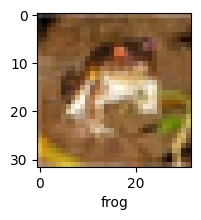

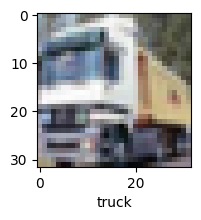

In [5]:
# Plot a few samples
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

In [6]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Build an artificial neural network (ANN)
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile the model
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history_ann = ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3038 - loss: 1.9417
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4186 - loss: 1.6403
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4574 - loss: 1.5512
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4756 - loss: 1.4896
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4963 - loss: 1.4412


In [10]:
# Evaluate the ANN
ann.evaluate(X_test, y_test)

# Make predictions
y_pred_ann = ann.predict(X_test)
y_pred_classes_ann = [np.argmax(element) for element in y_pred_ann]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4727 - loss: 1.4954
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [11]:
# Print classification report
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_classes_ann))

Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.75      0.50      1000
           1       0.48      0.77      0.59      1000
           2       0.43      0.23      0.30      1000
           3       0.41      0.18      0.25      1000
           4       0.43      0.41      0.42      1000
           5       0.38      0.41      0.39      1000
           6       0.59      0.43      0.50      1000
           7       0.49      0.61      0.54      1000
           8       0.72      0.41      0.53      1000
           9       0.56      0.46      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [12]:
# Build a convolutional neural network (CNN)
cnn = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output and add Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
history_cnn = cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.3939 - loss: 1.6597
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6041 - loss: 1.1269
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6592 - loss: 0.9835
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6958 - loss: 0.8775
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7198 - loss: 0.8105
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7413 - loss: 0.7452
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7632 - loss: 0.6878
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7749 - loss: 0.6399
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7922 - loss: 0.5950
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8057 - loss: 0.5526


In [14]:
# Evaluate the CNN
cnn.evaluate(X_test, y_test)

# Make predictions
y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6969 - loss: 0.9228
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
# Print classification report for CNN
print("CNN Classification Report: \n", classification_report(y_test, y_pred_classes_cnn))

CNN Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.74      1000
           1       0.70      0.88      0.78      1000
           2       0.54      0.63      0.58      1000
           3       0.59      0.40      0.48      1000
           4       0.60      0.65      0.62      1000
           5       0.66      0.55      0.60      1000
           6       0.69      0.84      0.76      1000
           7       0.75      0.77      0.76      1000
           8       0.84      0.77      0.80      1000
           9       0.81      0.73      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



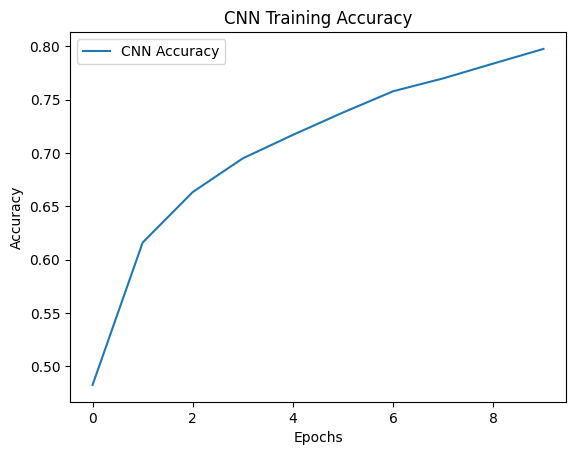

In [16]:
# Plotting the training accuracy for CNN
plt.plot(history_cnn.history['accuracy'], label='CNN Accuracy')
plt.title('CNN Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


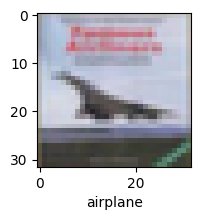

ANN Prediction: airplane
CNN Prediction: airplane


In [17]:
# Compare ANN and CNN predictions for a few samples
plot_sample(X_test, y_test, 3)
print(f"ANN Prediction: {classes[y_pred_classes_ann[3]]}")
print(f"CNN Prediction: {classes[y_pred_classes_cnn[3]]}")